## Base de datos
La base de datos a ser utilizada es la [Acoustic path database for ANC in-ear headphone development](https://www.iks.rwth-aachen.de/forschung/tools-downloads/databases/paths-for-active-noise-cancellation-development-and-research) de la universidad de Aachen, Alemania.

Proveen mediciones del "Electronic Backend", que es la respuesta en frecuencia del conjunto ADC-DAC y filtrado anti-alias.

Miden en dos lugares, una cabina acústica (Acoustic Booth) y una cámara semi-anecoica.

$f_s = 48kHz$, 194400 muestras, 4.05 segundos de sweep logarítmico.




In [24]:
import json

In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [27]:
database_path = "../../PANDAR_database_1.0/BoseQC20/processed_data.json"

In [28]:
with open(database_path) as f:
    data = json.load(f)

print(len(data['acoustic_booth'][0]['P'][1]))
print(len(data['anechoic_chamber']['primary'][0][1]))

8192
8192


In [33]:
# Obtain single acoustic system measurement
meas_idx = 0

acoustic_system = data['acoustic_booth'][meas_idx]


# Obtain each path's impulse response
# Only left channel will be used from now on
primary_path = np.array(acoustic_system['P'][0])
secondary_path = np.array(acoustic_system['G'][0])
feedback_path = np.array(acoustic_system['F'][0])

print(f'Campos del sistema acústico: {acoustic_system.keys()}')
print(f'Longitud: {len(primary_path)} muestras')

Campos del sistema acústico: dict_keys(['P', 'G', 'F'])
Longitud: 8192 muestras


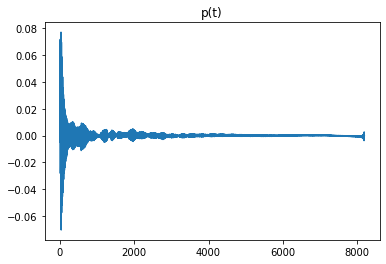

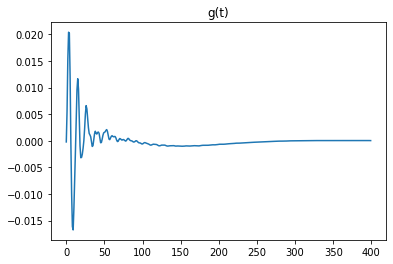

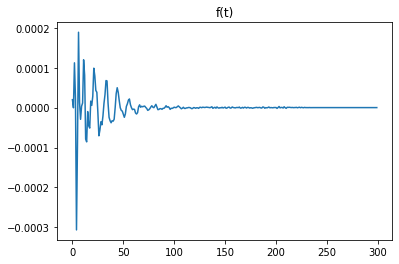

In [30]:
plt.title('p(t)')
plt.plot(primary_path)
plt.figure()
plt.title('g(t)')
plt.plot(secondary_path[0:400])
plt.figure()
plt.title('f(t)')
plt.plot(feedback_path[0:300])
plt.show()

In [34]:
# Obtain anechoic chamber measurement
# Only left channel will be used
anechoic_system = data['anechoic_chamber']
secondary_anec_path = np.array(anechoic_system['secondary'][0])
feedback_anec_path = np.array(anechoic_system['feedback'][0])

meas_idx = 0

# Obtain each path's impulse response
primary_anec_path = np.array(anechoic_system['primary'][meas_idx][0])

print(f'Campos del sistema acústico: {anechoic_system.keys()}')
print(f'Longitud: {len(primary_anec_path)} muestras')

Campos del sistema acústico: dict_keys(['primary', 'secondary', 'feedback'])
Longitud: 8192 muestras


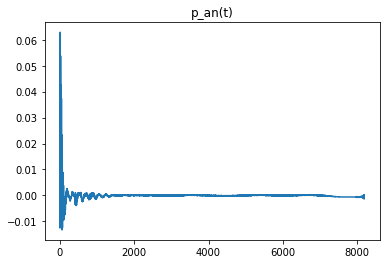

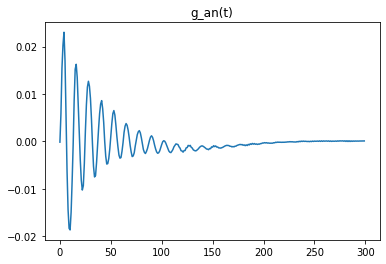

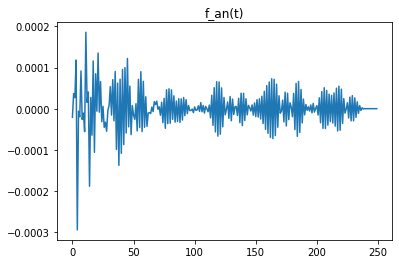

In [41]:
plt.title('p_an(t)')
plt.plot(primary_anec_path)
plt.figure()
plt.title('g_an(t)')
plt.plot(secondary_anec_path[:300])
plt.figure()
plt.title('f_an(t)')
plt.plot(feedback_anec_path[:250])
plt.show()